# 35.UnionFind2

### ABC231 D Dif:726
url : https://atcoder.jp/contests/abc231/tasks/abc231_d

### [概要]
前問でUnionFindの基礎を理解したので次は応用。  
連結しているかどうかの判定なんて何に使うのかと不思議に思った人もいるかもしれないが、本  
問のようにループがあるかの判定にもUnionFindは使える。使い方の一つとして覚えておこう。  

### [解説]
隣り合う人同士を辺でつながる頂点と考えると、以下2パターンで「No」となることがわかる。  
(1)「3人以上が隣り合う場合」⇔「一つの頂点から3本以上の辺が出ている場合」  
例えば以下図は人②が人①、人③、人④と隣り合わなければならないということを示している  
が、当然無理なので「No」となる。  
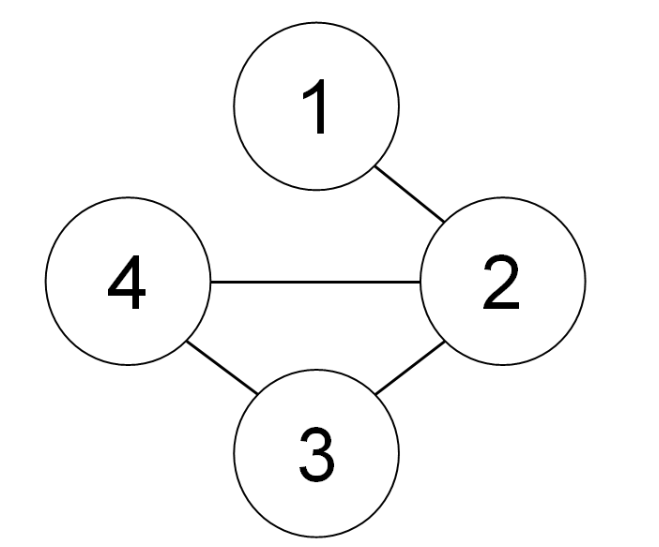  

(2)「ループしている場合」  
例えば以下図は人①と人②、人②と人③、人③と人④、人④と人①がそれぞれ隣り合わなけれ  
ばならないということを示している。円形に並ぶことはできないからこれも「No」のパターン。  
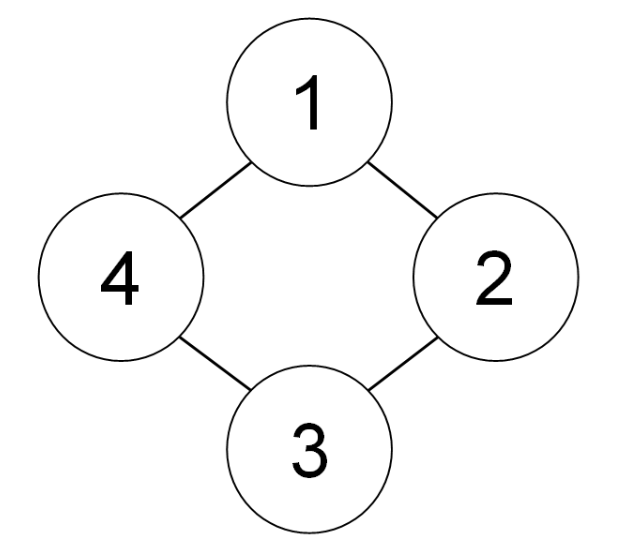  

(1)「3人以上が隣り合う場合」⇔「一つの頂点から3本以上の辺が出ている場合」  
このパターンは単に辺の本数を数えればよい。  
(2)「ループしている場合」  
このパターンの判定のためUnionFindを使う。  
「UnionFind」  
グラフの頂点の連結(Union)と2頂点が連結かを確認する処理(Find)を高速で行えるデータ構  
造。
グラフの2点がすでに連結である場合に、更に辺を張るとループが作られる。例えば以下図では  
頂点①と頂点④がすでに連結であり、更にここへ頂点①から頂点④へ辺を張るとループができる。  
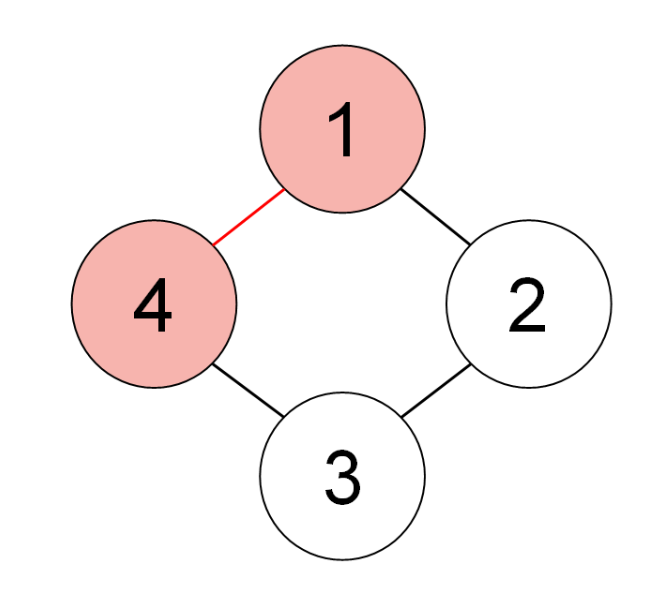  
よって入力Ai,Biに対し  
・Ai,Biがすでに連結である場合  
「No」を出力  
・連結でない場合  
Ai,Biを連結する  
と処理を行えば良い。  

### 実装のコツ
<UnionFind>
UnionFindは2つの要素のグループ化、グループに属しているかの判定を高速で行えるデータ構
造。
グラフ理論の用語でいうと、2つの頂点の「連結」(Union)と「連結であるかの判定」(Find)を高速で
行うことができる。
UnionFindはとてもよく使うデータ構造だが実装は難しい。
前の章からコピペしよう

In [ ]:
#unionfindを用いたいときはここからコピペ
#######################################################################
class UnionFind:
    def __init__(self,n):
        self.n=n
        self.parent_size=[-1]*n
    def leader(self,a):
        if self.parent_size[a]<0: return a
        self.parent_size[a]=self.leader(self.parent_size[a])
        return self.parent_size[a]
    def merge(self,a,b):
        x,y=self.leader(a),self.leader(b)
        if x == y: return
        if abs(self.parent_size[x])<abs(self.parent_size[y]):x,y=y,x
        self.parent_size[x] += self.parent_size[y]
        self.parent_size[y]=x
    def same(self,a,b):
        return self.leader(a) == self.leader(b)
    def size(self,a):
        return abs(self.parent_size[self.leader(a)])
    def groups(self):
        result=[[] for _ in range(self.n)]
        for i in range(self.n):
            result[self.leader(i)].append(i)
        return [r for r in result if r != []]
##############################################################################

#入力
N,M = map(int,input().split())

#UnionFind 初期化
UF = UnionFind(N+1)

#辺の本数をカウント
count = [0] *(N+1)
#M回
for i in range(M):
    #入力
    A,B = map(int,input().split())
    
    #辺の本数をカウント
    count[A] += 1
    count[B] += 1
    
    #辺の本数が三本以上なら
    if 3<= count[A] or 3<=count[B]:
        #「No」を出力
        print('No')
        #終了
        exit()
    
    #A,Bが連結の場合
    if UF.same(A,B) == True:
        #Noを出力
        print('No')
        exit()
    
    #そうでない場合(連結ではない場合)
    else:
        #A,Bに辺を張る(連結する)
        UF.merge(A,B)

#「Yes」を出力
print('Yes')

### 別解
ループがあるかの判定はDFS(深さ優先探索)でもできる。すでに訪問した頂点に再度訪問してい  
るかで判定する。  
「DFS(深さ優先探索)」  
Depth First Searchの略。  
グラフや木構造を探索するためのアルゴリズムの一つで、探索を開始する頂点から先に進める  
だけ進み、戻るという手順を繰り返す。  
実装には再帰関数を使うことが多い。  

In [ ]:
#別解
#再起関数上限。再起関数を使うときは必ず書くこと
import sys
sys.setrecursionlimit (10**6)

#入力の受け取り
N,M = map(int,input().split())

#つながっている頂点の記録
connect = [[]for i in range(N+1)]

#M回
for i in range(M):
    #入力
    A,B = map(int,input().split())
    
    #A→B, B→Aに行ける
    connect[A].append(B)
    connect[B].append(A)
    
    #辺の本数が3本以上なら
    if 3 <= len(connect[A]) or 3 <= len(connect[B]):
        #「No」を出力
        print('No')
        #終了
        exit()

#まだ訪問済みではない頂点
visitd = [False]*(N+1)

#DFS(今いる頂点、直前にいた頂点)
def DFS(Now,Pre):
    #今いる頂点を訪問済みにする
    visitd[Now] = True
    
    #to=Nowからいける頂点
    for to in connect[Now]:
        #直前にいた頂点でなければ
        if to != Pre:
            #訪問済みでなければ
            if visitd[to] == False:
                #次のDFSを開始
                DFS(to, Now)
            #訪問済みであれば
            #⇔ループになった
            else:
                print('No')
                #終了
                exit()

#i = 1~N
for i in range(1,N+1):
    #訪問済みでなければ
    if visitd[i] == False:
        #DFSを開始
        #(直前にいた頂点はないので0にしておく)
        DFS(i,0)

#「Yes」を出力
print('Yes')